In [47]:
### Data Collection
import pandas_datareader as pdr
key=" "

In [48]:
df = pdr.get_data_tiingo('AMZN', api_key=key)

In [49]:
df.to_csv('stock.csv')

In [50]:
import pandas as pd

In [51]:
df=pd.read_csv('stock.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2016-04-26 00:00:00+00:00,616.88,626.7549,614.8800,626.17,2521433,616.88,626.7549,614.8800,626.17,2521433,0.0,1.0
1,AMZN,2016-04-27 00:00:00+00:00,606.57,615.9500,601.2800,611.80,4068767,606.57,615.9500,601.2800,611.80,4068767,0.0,1.0
2,AMZN,2016-04-28 00:00:00+00:00,602.00,626.8000,599.2000,615.54,7872605,602.00,626.8000,599.2000,615.54,7872605,0.0,1.0
3,AMZN,2016-04-29 00:00:00+00:00,659.59,669.9800,654.0000,666.00,10310739,659.59,669.9800,654.0000,666.00,10310739,0.0,1.0
4,AMZN,2016-05-02 00:00:00+00:00,683.85,685.5000,662.0251,663.92,6578517,683.85,685.5000,662.0251,663.92,6578517,0.0,1.0


In [52]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AMZN,2021-04-19 00:00:00+00:00,3372.01,3435.9333,3360.1600,3390.33,2725405,3372.01,3435.9333,3360.1600,3390.33,2725405,0.0,1.0
1254,AMZN,2021-04-20 00:00:00+00:00,3334.69,3382.9900,3316.0000,3373.60,2623032,3334.69,3382.9900,3316.0000,3373.60,2623032,0.0,1.0
1255,AMZN,2021-04-21 00:00:00+00:00,3362.02,3362.8600,3303.8061,3316.00,2211166,3362.02,3362.8600,3303.8061,3316.00,2211166,0.0,1.0
1256,AMZN,2021-04-22 00:00:00+00:00,3309.04,3372.8700,3301.4500,3371.68,2580590,3309.04,3372.8700,3301.4500,3371.68,2580590,0.0,1.0
1257,AMZN,2021-04-23 00:00:00+00:00,3340.88,3375.0000,3308.5000,3319.10,3196652,3340.88,3375.0000,3308.5000,3319.10,3196652,0.0,1.0


In [53]:
df1=df.reset_index()['close']
df1

0        616.88
1        606.57
2        602.00
3        659.59
4        683.85
         ...   
1253    3372.01
1254    3334.69
1255    3362.02
1256    3309.04
1257    3340.88
Name: close, Length: 1258, dtype: float64

In [54]:
df2=df1[:1200]
df2

0        616.88
1        606.57
2        602.00
3        659.59
4        683.85
         ...   
1195    3294.00
1196    3326.13
1197    3232.58
1198    3237.62
1199    3206.20
Name: close, Length: 1200, dtype: float64

# New Section

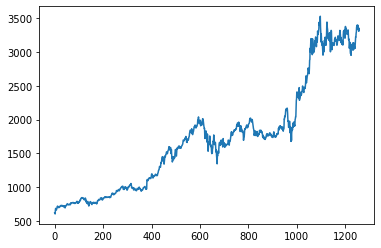

In [55]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [56]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [57]:
print(df1)

[[0.00507945]
 [0.00156002]
 [0.        ]
 ...
 [0.9421632 ]
 [0.9240779 ]
 [0.93494683]]


In [58]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 441)

In [59]:
train_data

array([[0.00507945],
       [0.00156002],
       [0.        ],
       [0.01965898],
       [0.0279404 ],
       [0.02366314],
       [0.02351977],
       [0.0194883 ],
       [0.02456092],
       [0.02654082],
       [0.03450136],
       [0.03796958],
       [0.03957398],
       [0.03683968],
       [0.03709229],
       [0.03183874],
       [0.03258291],
       [0.03294816],
       [0.03440919],
       [0.03234396],
       [0.03488709],
       [0.03630374],
       [0.03854307],
       [0.03763164],
       [0.041233  ],
       [0.04008944],
       [0.04309341],
       [0.04217174],
       [0.04257796],
       [0.04155729],
       [0.04254724],
       [0.04289201],
       [0.03956715],
       [0.03865572],
       [0.04004165],
       [0.03832119],
       [0.03943061],
       [0.03563468],
       [0.03823585],
       [0.03885371],
       [0.03707181],
       [0.04099063],
       [0.03309836],
       [0.03050402],
       [0.0361672 ],
       [0.03877861],
       [0.03878544],
       [0.042

In [60]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [88]:
X_train, y_train

(array([[[0.00507945],
         [0.00156002],
         [0.        ],
         ...,
         [0.05427981],
         [0.05430712],
         [0.05724283]],
 
        [[0.00156002],
         [0.        ],
         [0.01965898],
         ...,
         [0.05430712],
         [0.05724283],
         [0.06025704]],
 
        [[0.        ],
         [0.01965898],
         [0.0279404 ],
         ...,
         [0.05724283],
         [0.06025704],
         [0.05908959]],
 
        ...,
 
        [[0.35310382],
         [0.35470481],
         [0.35427469],
         ...,
         [0.48060216],
         [0.47450204],
         [0.46967861]],
 
        [[0.35470481],
         [0.35427469],
         [0.36516411],
         ...,
         [0.47450204],
         [0.46967861],
         [0.4651112 ]],
 
        [[0.35427469],
         [0.36516411],
         [0.37350697],
         ...,
         [0.46967861],
         [0.4651112 ],
         [0.47231733]]]),
 array([0.06025704, 0.05908959, 0.06083736, 0.06408712,

In [62]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [63]:
print(X_test.shape),print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [64]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
X_train

array([[[0.00507945],
        [0.00156002],
        [0.        ],
        ...,
        [0.05427981],
        [0.05430712],
        [0.05724283]],

       [[0.00156002],
        [0.        ],
        [0.01965898],
        ...,
        [0.05430712],
        [0.05724283],
        [0.06025704]],

       [[0.        ],
        [0.01965898],
        [0.0279404 ],
        ...,
        [0.05724283],
        [0.06025704],
        [0.05908959]],

       ...,

       [[0.35310382],
        [0.35470481],
        [0.35427469],
        ...,
        [0.48060216],
        [0.47450204],
        [0.46967861]],

       [[0.35470481],
        [0.35427469],
        [0.36516411],
        ...,
        [0.47450204],
        [0.46967861],
        [0.4651112 ]],

       [[0.35427469],
        [0.36516411],
        [0.37350697],
        ...,
        [0.46967861],
        [0.4651112 ],
        [0.47231733]]])

In [66]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [67]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 259ms/step - loss: 0.0452 - val_loss: 0.0528
Epoch 2/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 3/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 4/100
12/12 [==============================] - 2s 191ms/step - loss: 6.2488e-04 - val_loss: 0.0025
Epoch 5/100
12/12 [==============================] - 2s 191ms/step - loss: 6.4290e-04 - val_loss: 0.0027
Epoch 6/100
12/12 [==============================] - 2s 202ms/step - loss: 5.9394e-04 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 2s 192ms/step - loss: 5.4756e-04 - val_loss: 0.0034
Epoch 8/100
12/12 [==============================] - 2s 191ms/step - loss: 5.2136e-04 - val_loss: 0.0044
Epoch 9/100
12/12 [==============================] - 2s 189ms/step - loss: 5.4078e-04 - val_loss: 0.0053
Epoch 10/100
12/12 [==============================] - 2s 193ms/step

In [71]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [72]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [73]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1401.6531208099434

In [74]:
## Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2632.97295081633

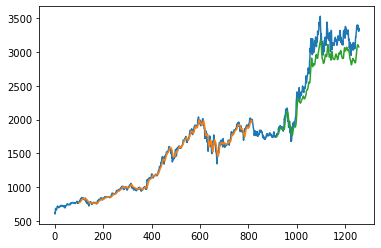

In [75]:
## Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()